# введение

In [1]:
import pandas as pd
import numpy as np

## дискретные величины

In [2]:
np.random.binomial(1,0.5)

1

In [3]:
result = []
for i in range(3):
    result.append(np.random.binomial(1,0.5))

result

[0, 1, 0]

In [5]:
[np.random.binomial(1,0.5) for _ in range(10)]

[0, 1, 1, 1, 0, 0, 1, 1, 0, 0]

In [6]:
np.random.binomial(1,0.5,size = 3)

array([0, 1, 1])

In [9]:
pd.Series([0,1]).sample(1).values[0]

0

In [10]:
def coin_toss(x = 3):
    return np.random.binomial(1,0.5,size = x)

In [21]:
coin_toss(100)

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1])

существует выбор рандомного значения с фозвращением и без:
- без
pd.Series([0,1]).sample(1).values[0]
- с
pd.Series([0,1]).sample(1, replace = True).values[0]

In [34]:
pd.Series([0,1]).sample(10, replace = True).values

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 1], dtype=int64)

In [43]:
pd.Series([i for i in range(1,7)]).sample(10, replace = 1)

4    5
1    2
3    4
4    5
1    2
0    1
5    6
4    5
3    4
1    2
dtype: int64

сделаем так, чтобы генератор проиндексировал случайны массив

In [46]:
pd.Series([i for i in range(1,7)]).sample(10, replace = 1).reset_index(drop =1)

0    3
1    2
2    2
3    6
4    5
5    5
6    2
7    4
8    3
9    3
dtype: int64

когда нам надо поработать над "нечестной монеточкой" xd можно

In [59]:
np.random.binomial(1,0.3,size = 10)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [79]:
pd.Series([0] * 7 + [1] * 3).sample(10,replace=1).reset_index(drop = 1)

0    0
1    1
2    0
3    0
4    1
5    0
6    0
7    0
8    1
9    0
dtype: int64

## непрерывные величины

In [141]:
pd.Series([np.random.uniform(size = 1).mean() for _ in range(10)]).mean()

0.4851536082084779

<AxesSubplot:>

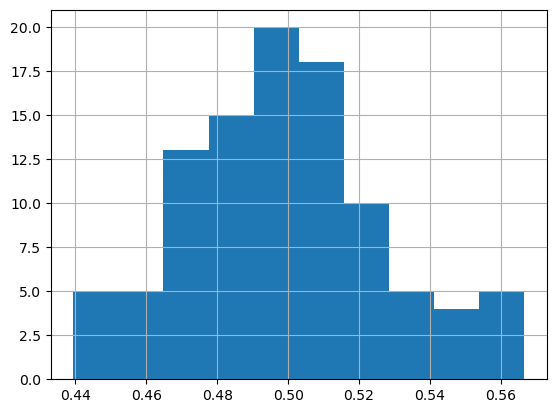

In [143]:
pd.Series([np.random.uniform(size = 100).mean() for _ in range(100)]).hist()

<AxesSubplot:>

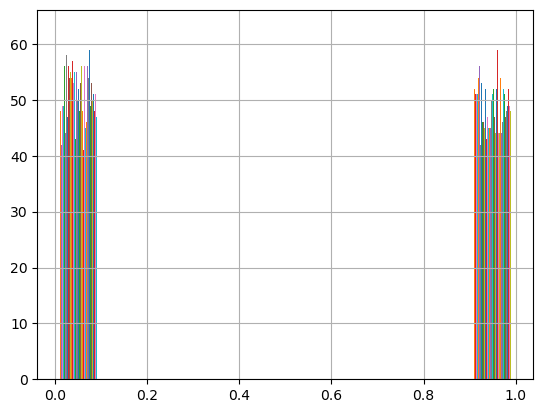

In [148]:
pd.Series([np.random.binomial(1,0.5,size = 100) for _ in range(100)]).hist()

# PMF, CDF, PDF

In [149]:
import seaborn as sns

In [181]:
u = np.random.randint(1,7,size = 10_000)
n = np.random.normal(size = 100_000)

## Probability mass function

<AxesSubplot:ylabel='Probability'>

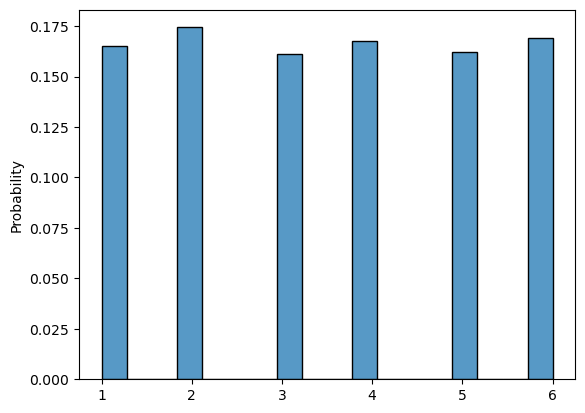

In [175]:
sns.histplot(u, stat='probability')

<AxesSubplot:ylabel='Probability'>

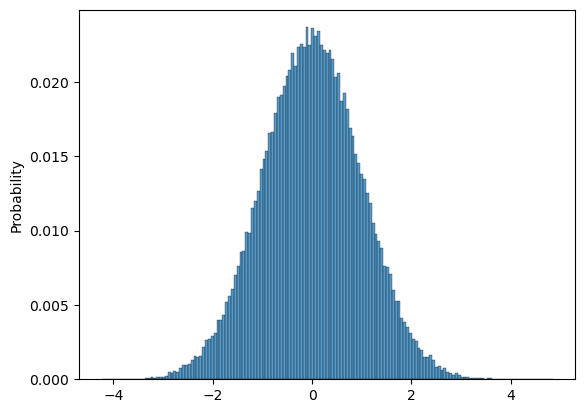

In [182]:
sns.histplot(n, stat='probability')

## Cumulative distribution function

<AxesSubplot:ylabel='Proportion'>

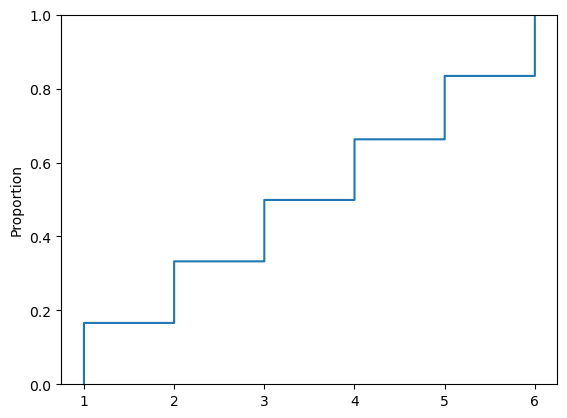

In [163]:
sns.ecdfplot(u)

<AxesSubplot:ylabel='Proportion'>

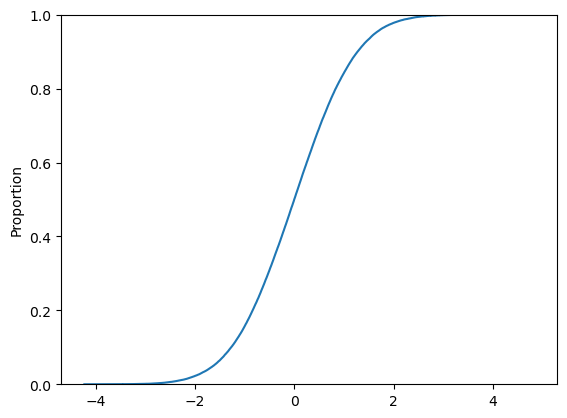

In [183]:
sns.ecdfplot(n)

## qq plot

qq plot показывает насколько наши выборочные значения соответствуют предсказанным значениям, если бы наше распределение было идеально нормальным

In [205]:
measurements_u = np.random.uniform(size = 10_000)
measurements_n = np.random.normal(size = 100_000)

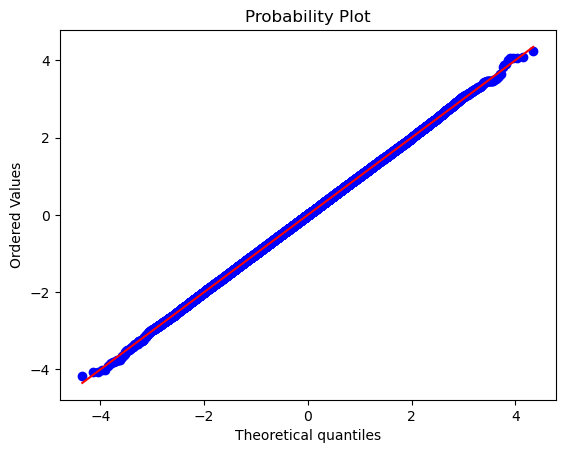

In [206]:
import pylab 
import scipy.stats as stats
   
stats.probplot(measurements_n, dist="norm", plot=pylab)
pylab.show()